In [41]:
from sys import displayhook
from binance.client import Client
from binance.enums import *
import pandas as pd
import time
import datetime
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns

In [3]:
with open('output_results_2204.pickle', 'rb') as handle:
    output_results_2204 = pkl.load(handle)

In [4]:
output_results_2204_todf = []

for x in range(len(output_results_2204)):
    for y in range(len(output_results_2204[x][1])):
        output_results_2204_todf.append( [output_results_2204[x][0][0], output_results_2204[x][0][1] ] + list(output_results_2204[x][1][y]) )

In [87]:
df = pd.DataFrame(output_results_2204_todf)
df.rename(columns={0: 'sbuy', 1: 'ssell', 2: 'id', 3: 'tbuy', 4: 'tsell', 5: 'pbuy', 6: 'psell', 7: 'ret',}, inplace=True)

In [118]:
temp = df.copy()
df

,sbuy,ssell,id,tbuy,tsell,pbuy,psell,ret
0,20,10,257,2022-03-11 08:00:00,2022-03-11 09:00:00,2.9690,2.9430,0.991243
1,20,10,188,2022-03-12 21:00:00,2022-03-13 04:00:00,0.3789,0.3770,0.994985
2,20,10,108,2022-03-13 11:00:00,2022-03-13 12:00:00,1.6510,1.6480,0.998183
3,20,10,204,2022-03-21 21:00:00,2022-03-21 22:00:00,0.8090,0.8090,1.000000
4,20,10,168,2022-03-22 04:00:00,2022-03-22 16:00:00,4.4920,4.5190,1.006011
...,...,...,...,...,...,...,...,...
42624,90,90,107,2022-04-14 16:00:00,2022-04-14 17:00:00,0.3336,0.3302,0.989808
42625,90,90,254,2022-04-14 17:00:00,2022-04-14 18:00:00,0.5201,0.5267,1.012690
42626,90,90,104,2022-04-14 18:00:00,2022-04-14 19:00:00,36.9600,36.6600,0.991883
42627,90,90,15,2022-04-14 18:00:00,2022-04-14 19:00:00,0.3768,0.3742,0.993100


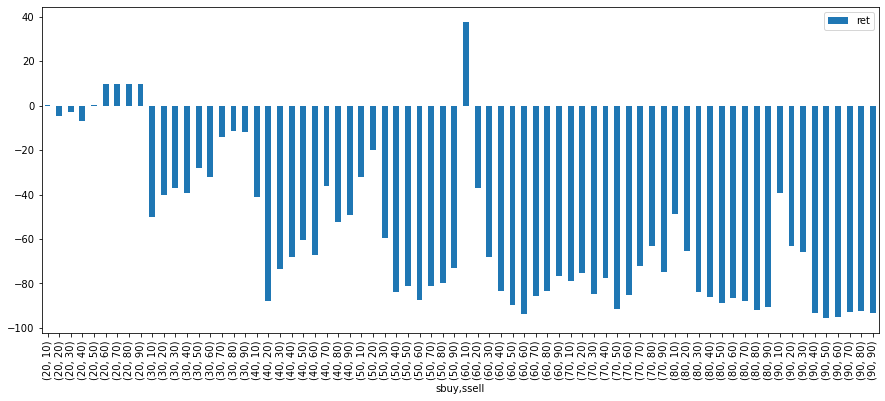

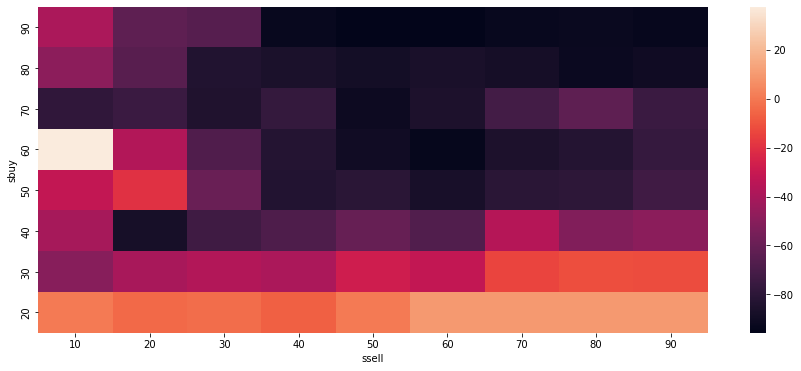

In [138]:
temp = df.copy()
fig, ax = plt.subplots(figsize=(15,6))
temp = temp[['sbuy', 'ssell', 'ret']].groupby(['sbuy', 'ssell']).prod()
temp['ret'] = (temp['ret']-1) * 100
temp.plot(kind='bar', ax=ax)
plt.show()
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(temp.reset_index().pivot("sbuy", "ssell", "ret"), vmin=temp['ret'].min(), vmax=temp['ret'].max())
ax.invert_yaxis()
plt.show()

<AxesSubplot:xlabel='id'>

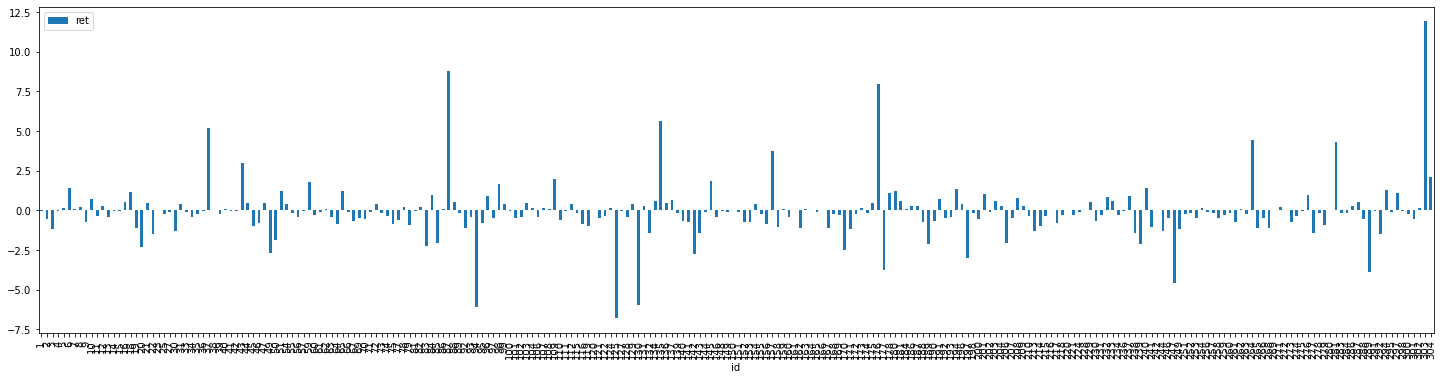

In [93]:
fig, ax = plt.subplots(figsize=(25,6))
temp = df[['id', 'ret']].groupby(['id']).mean()
temp['ret'] = (temp['ret']-1) * 100
temp.plot(ax=ax, kind='bar')

In [144]:
temp = df.copy()
temp = temp[['id', 'ret']].groupby(['id']).mean()
temp['count'] = df[['id', 'ret']].groupby(['id']).count()
temp = temp.reset_index()
temp['ret'] = (temp['ret']-1) * 100

fig, ax = plt.subplots(figsize=(25,6))

norm = plt.Normalize(temp['count'].min(), temp['count'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

ax = sns.barplot(data=temp, x='id', y='ret', hue='count')
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()


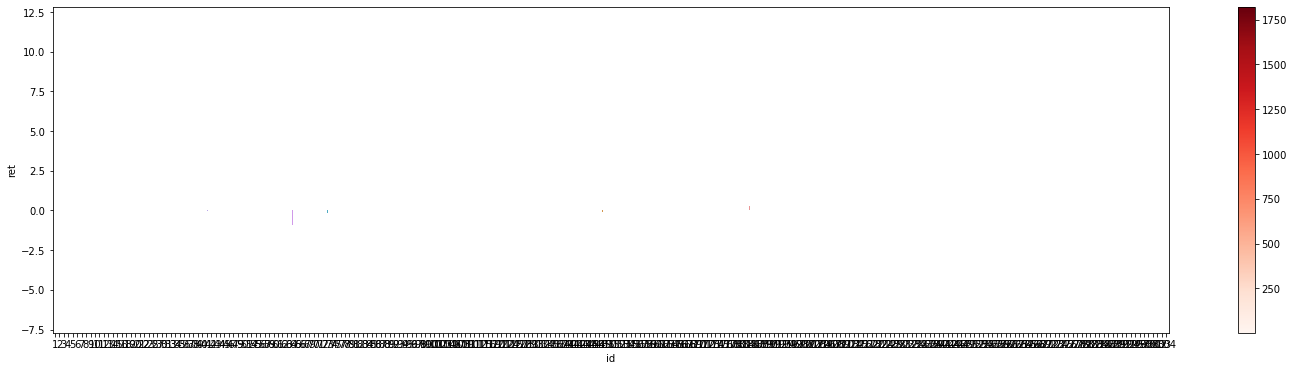

In [145]:
fig, ax = plt.subplots(figsize=(25,6))

norm = plt.Normalize(temp['count'].min(), temp['count'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

ax = sns.barplot(data=temp, x='id', y='ret', hue='count')
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()

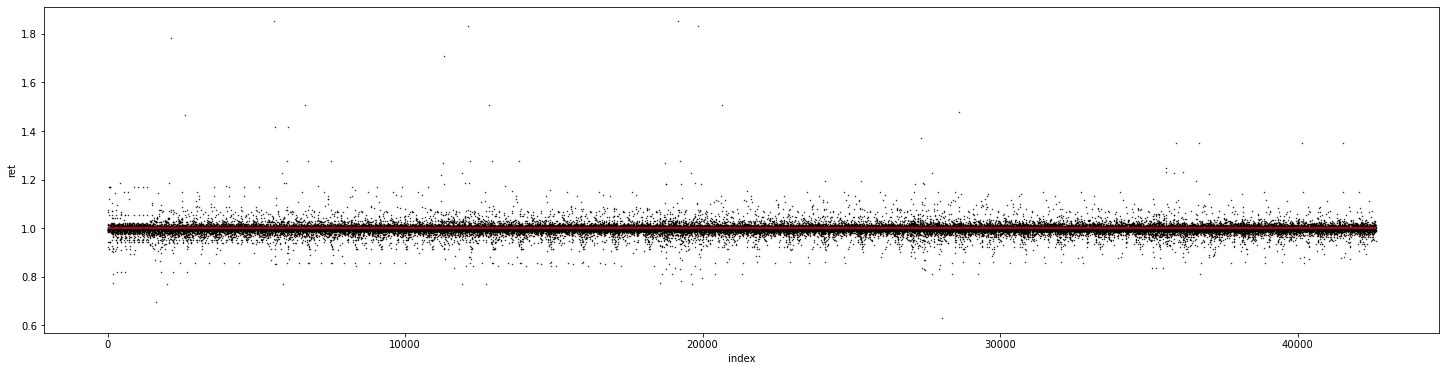

In [178]:
fig, ax = plt.subplots(figsize=(25,6))

temp = df.copy()
temp.reset_index().plot(x='index', y='ret', ax=ax, kind='scatter', s=0.2, color='black')
ax.hlines(y=1, color='r', linestyle='-', xmin=0, xmax=len(temp))

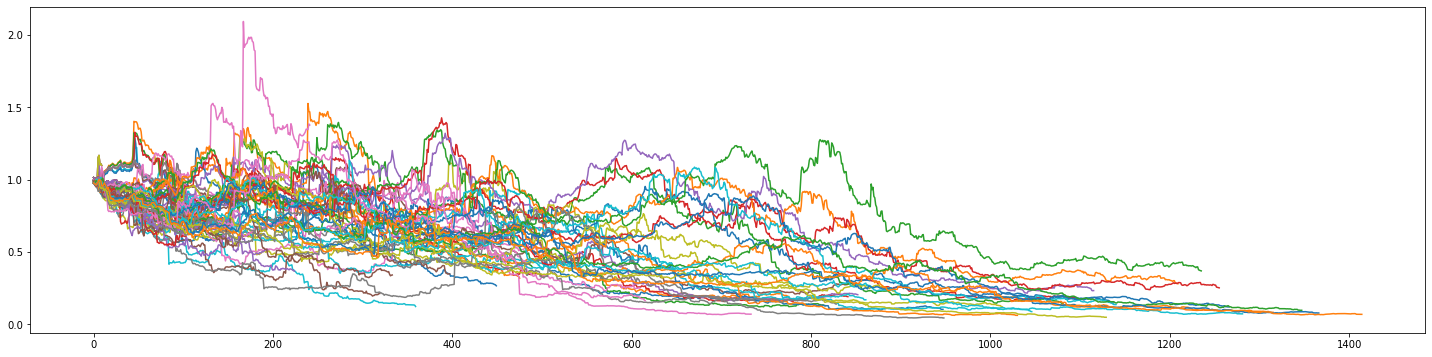

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


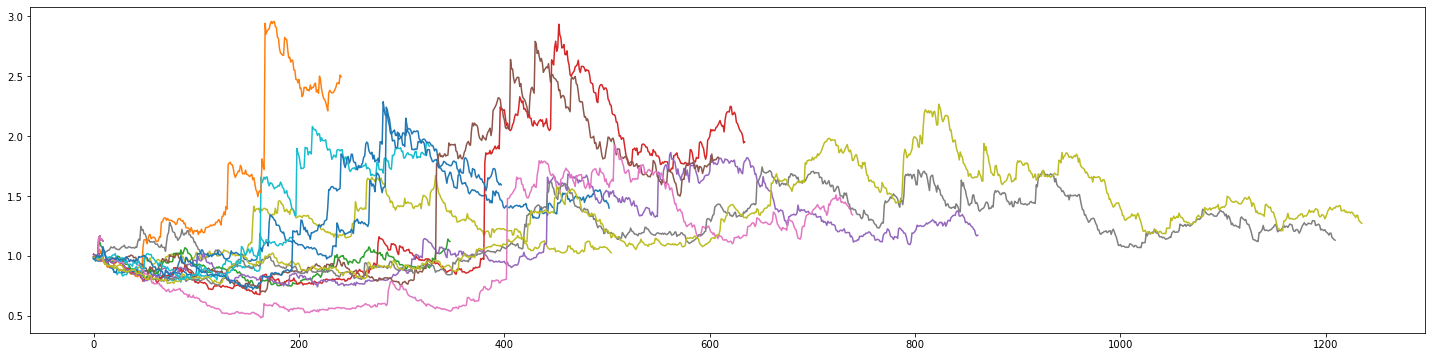

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


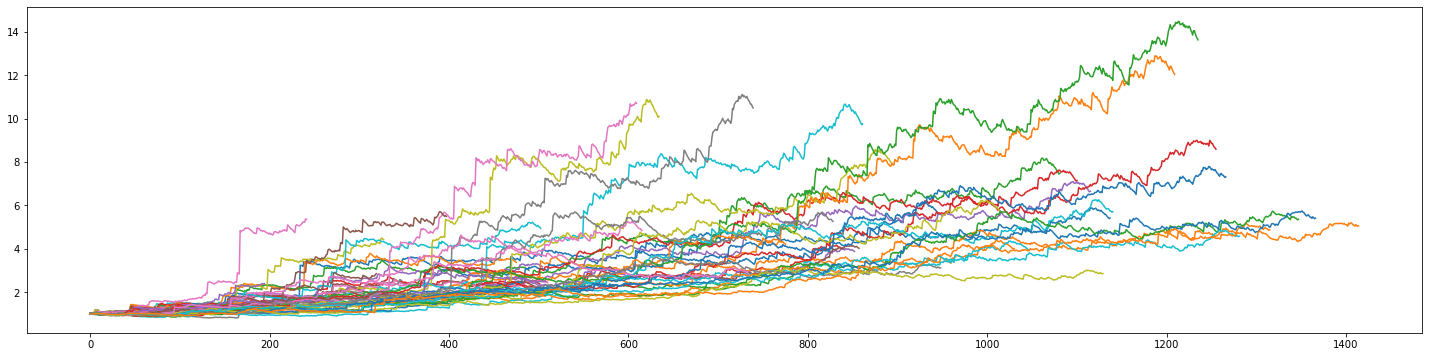

In [191]:
# 1
with open('output_results_2204.pickle', 'rb') as handle:
    output_results_2204 = pkl.load(handle)

fig, ax = plt.subplots(figsize=(25,6))
for x in range(len(output_results_2204)):
    ax.plot(output_results_2204[x][1][:,5].cumprod())
plt.show()

# %matplotlib widget
# 2
output_results_2204_sl = np.copy(output_results_2204)
for x in range(len(output_results_2204_sl)):
    for y in range(len(output_results_2204_sl[x][1][:,5])):
        output_results_2204_sl[x][1][:,5][y] = np.maximum(output_results_2204_sl[x][1][:,5][y], 0.97)

fig, ax = plt.subplots(figsize=(25,6))

for x in range(len(output_results_2204_sl)):
    if output_results_2204_sl[x][1][:,5].prod() > 1:
        plt.plot(output_results_2204_sl[x][1][:,5].cumprod())
plt.show()

# 3
with open('output_results_2204.pickle', 'rb') as handle:
    output_results_2204 = pkl.load(handle)

output_results_2204_sl = np.copy(output_results_2204)
for x in range(len(output_results_2204_sl)):
    for y in range(len(output_results_2204_sl[x][1][:,5])):
        output_results_2204_sl[x][1][:,5][y] = np.maximum(output_results_2204_sl[x][1][:,5][y], 0.99)

fig, ax = plt.subplots(figsize=(25,6))

for x in range(len(output_results_2204_sl)):
    if output_results_2204_sl[x][1][:,5].prod() > 1:
        plt.plot(output_results_2204_sl[x][1][:,5].cumprod())
plt.show()

In [ ]:
ignore_ids = list(groupeddf.groupby([2]).mean()[ groupeddf.groupby([2]).mean()[7] < 0.95 ].index)
output_results_2204_remove = np.copy(output_results_2204)
%matplotlib widget
for x in range(len(output_results_2204_remove)):
    for y in range(len(output_results_2204_remove[x][1])):
        if output_results_2204_remove[x][1][y][0] in ignore_ids:
            output_results_2204_remove[x][1][y][5] = 1

%matplotlib widget
for x in range(len(output_results_2204_remove)):
    if output_results_2204_remove[x][1][:,5].prod() > 1:
        plt.plot(output_results_2204_remove[x][1][:,5].cumprod())
        print(output_results_2204_remove[x][1][:,5].prod(), x)
plt.legend()

Checking if winners dipped below val

In [242]:
temp = df.copy()

wdf = temp[temp['ret'] >1][['id', 'tbuy', 'pbuy', 'tsell']]

In [341]:
temp[temp['ret'] >1][['id', 'tbuy', 'pbuy', 'tsell', 'ret']]

,id,tbuy,pbuy,tsell,ret
4,168,2022-03-22 04:00:00,4.4920,2022-03-22 16:00:00,1.006011
5,87,2022-03-27 20:00:00,0.0350,2022-03-28 16:00:00,1.017143
6,108,2022-04-03 05:00:00,1.9610,2022-04-03 07:00:00,1.014278
7,31,2022-04-03 09:00:00,1.4760,2022-04-06 00:00:00,1.003388
15,87,2022-03-27 20:00:00,0.0350,2022-03-28 12:00:00,1.076000
...,...,...,...,...,...
42619,44,2022-04-14 12:00:00,0.8920,2022-04-14 13:00:00,1.006726
42620,261,2022-04-14 12:00:00,43.3100,2022-04-14 13:00:00,1.003463
42623,272,2022-04-14 16:00:00,1.0012,2022-04-14 17:00:00,1.000300
42625,254,2022-04-14 17:00:00,0.5201,2022-04-14 18:00:00,1.012690


In [244]:
wdf.groupby(['id', 'tbuy', 'pbuy']).max().sort_values(by=['id', 'tbuy'], ascending=[True, False])

tsell
id  tbuy                pbuy                         
1   2022-03-26 23:00:00 1.61700   2022-03-27 00:00:00
    2022-03-03 17:00:00 1.42200   2022-03-03 18:00:00
2   2022-04-11 16:00:00 162.00000 2022-04-11 17:00:00
    2022-04-10 14:00:00 178.80000 2022-04-10 15:00:00
    2022-04-09 17:00:00 180.60000 2022-04-10 04:00:00
...                                               ...
303 2022-03-26 15:00:00 0.05824   2022-03-27 03:00:00
    2022-03-26 13:00:00 0.05717   2022-03-28 00:00:00
304 2022-04-07 16:00:00 0.73970   2022-04-08 00:00:00
    2022-03-16 16:00:00 0.49970   2022-03-17 17:00:00
    2022-03-13 16:00:00 0.49530   2022-04-03 00:00:00

[1752 rows x 1 columns]

In [238]:
warray = wdf.groupby(['id', 'tbuy', 'pbuy']).max().sort_values(by=['id', 'tbuy'], ascending=[True, False]).reset_index().to_numpy()

In [239]:
warray

array([[1, Timestamp('2022-03-26 23:00:00'), 1.617,
        Timestamp('2022-03-27 00:00:00')],
       [1, Timestamp('2022-03-03 17:00:00'), 1.422,
        Timestamp('2022-03-03 18:00:00')],
       [2, Timestamp('2022-04-11 16:00:00'), 162.0,
        Timestamp('2022-04-11 17:00:00')],
       ...,
       [304, Timestamp('2022-04-07 16:00:00'), 0.7397,
        Timestamp('2022-04-08 00:00:00')],
       [304, Timestamp('2022-03-16 16:00:00'), 0.4997,
        Timestamp('2022-03-17 17:00:00')],
       [304, Timestamp('2022-03-13 16:00:00'), 0.4953,
        Timestamp('2022-04-03 00:00:00')]], dtype=object)

In [265]:
from binance.client import Client
from binance.enums import *
api_key = 'ihvXWbHvvDrYuroIJOS9ANW6X7tv5OQSYibLLloKyIGui0w93Q5yUJOBZclnNL5D'
api_secret = 'uzmKBJ3lmVS4TsTl2AOHVJOYTFfLM5qrg00vAqUyTYbSjiy7BDPlTpaq2Oy7qdo2'
client = Client(api_key, api_secret)
db_data = 'mysql+mysqldb://' + 'admin' + ':' + '0323A8E3DB' + '@' + 'coin-database-1-instance-1.c9hqcydvu19f.us-east-1.rds.amazonaws.com' + ':3306/' + 'crypto_db' + '?charset=utf8mb4'
engine = create_engine(db_data)
cryptoString = 'SELECT * FROM crypto'
crypto_table = pd.read_sql_query(cryptoString, engine)

def getminutedata(symbol, start, end):
    frame = pd.DataFrame(client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1MINUTE, start, end))
    frame = frame.iloc[:,:6]
    frame = frame.set_index('date')
    frame.index = pd.to_datetime(frame.index, unit= 'ms')
    frame = frame.astype(float)
    return frame.reset_index()

tickerdict = pd.Series(crypto_table.ticker.values,index=crypto_table.id).to_dict()

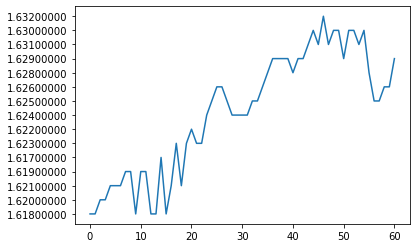

In [269]:
#['date', 'open', 'high', 'low', 'close', 'volume']
out  = client.get_historical_klines(tickerdict[1], Client.KLINE_INTERVAL_1MINUTE, '2022-03-26 23:00:00', '2022-03-27 00:00:00')


plt.plot(np.array(out)[:,4])

In [298]:
id = 0
results = []
for trade in warray:
    id = int(trade[0])
    start_string = str(trade[1])
    start_val = trade[2]
    end_string = str(trade[3])
    out  = client.get_historical_klines(tickerdict[id], Client.KLINE_INTERVAL_1MINUTE, start_string, end_string)
    closes = np.array(out)[:,4].astype(float)
    closes = closes[list(closes).index(start_val):]
    if np.any(closes < start_val*0.99):
        results.append(True)
    else:
        results.append(False)
print(f"{sum(results) * 100/len(results)}% results would have sold at 0.99")

19.34931506849315% results would have sold at 0.99


With wins that would have been stopped, find trade id, time b+s so that ret can be replaced with 0.99 

In [312]:
test = wdf.groupby(['id', 'tbuy', 'pbuy']).max().sort_values(by=['id', 'tbuy'], ascending=[True, False])
test['stopped'] = results
test

tsell  stopped
id  tbuy                pbuy                                  
1   2022-03-26 23:00:00 1.61700   2022-03-27 00:00:00    False
    2022-03-03 17:00:00 1.42200   2022-03-03 18:00:00     True
2   2022-04-11 16:00:00 162.00000 2022-04-11 17:00:00     True
    2022-04-10 14:00:00 178.80000 2022-04-10 15:00:00    False
    2022-04-09 17:00:00 180.60000 2022-04-10 04:00:00    False
...                                               ...      ...
303 2022-03-26 15:00:00 0.05824   2022-03-27 03:00:00     True
    2022-03-26 13:00:00 0.05717   2022-03-28 00:00:00    False
304 2022-04-07 16:00:00 0.73970   2022-04-08 00:00:00     True
    2022-03-16 16:00:00 0.49970   2022-03-17 17:00:00     True
    2022-03-13 16:00:00 0.49530   2022-04-03 00:00:00     True

[1752 rows x 2 columns]

In [344]:
stopped_trades = test[test.stopped].reset_index()[['id','tbuy', 'tsell']].to_numpy()
list(stopped_trades)

[array([1, Timestamp('2022-03-03 17:00:00'),
        Timestamp('2022-03-03 18:00:00')], dtype=object),
 array([2, Timestamp('2022-04-11 16:00:00'),
        Timestamp('2022-04-11 17:00:00')], dtype=object),
 array([2, Timestamp('2022-04-01 18:00:00'),
        Timestamp('2022-04-01 21:00:00')], dtype=object),
 array([2, Timestamp('2022-03-16 18:00:00'),
        Timestamp('2022-03-17 07:00:00')], dtype=object),
 array([2, Timestamp('2022-03-15 05:00:00'),
        Timestamp('2022-03-15 11:00:00')], dtype=object),
 array([2, Timestamp('2022-03-08 14:00:00'),
        Timestamp('2022-03-10 01:00:00')], dtype=object),
 array([2, Timestamp('2022-03-08 01:00:00'),
        Timestamp('2022-03-08 13:00:00')], dtype=object),
 array([2, Timestamp('2022-03-02 03:00:00'),
        Timestamp('2022-03-02 11:00:00')], dtype=object),
 array([3, Timestamp('2022-04-02 10:00:00'),
        Timestamp('2022-04-02 12:00:00')], dtype=object),
 array([3, Timestamp('2022-03-23 16:00:00'),
        Timestamp('2022-03-2

In [343]:
len(list(stopped_trades))

339

In [321]:
with open('output_results_2204.pickle', 'rb') as handle:
    output_results_2204_stoploss = pkl.load(handle)

In [369]:
count = 0
count2 = 0
for x in range(len(output_results_2204_stoploss)):
    for y in range(len(output_results_2204_stoploss[x][1])):
        if output_results_2204_stoploss[x][1][y][0:3].tolist() in stopped_trades.tolist():
            output_results_2204_stoploss[x][1][y][5] = 0.99
            # print(np.where(stopped_trades == output_results_2204_stoploss[x][1][y][0:3]))
            count +=1

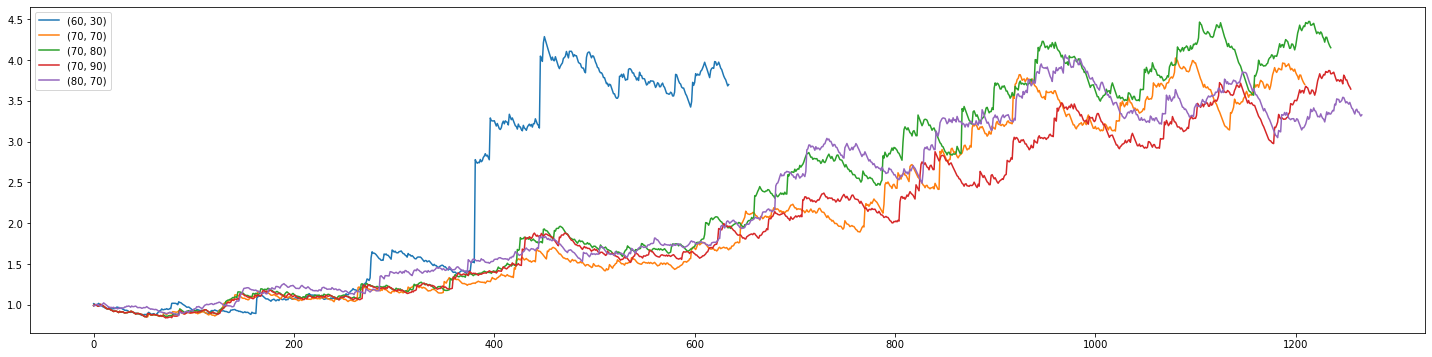

In [397]:
%matplotlib inline
for x in range(len(output_results_2204_stoploss)):
    for y in range(len(output_results_2204_stoploss[x][1][:,5])):
        output_results_2204_stoploss[x][1][:,5][y] = np.maximum(output_results_2204_stoploss[x][1][:,5][y], 0.99)

fig, ax = plt.subplots(figsize=(25,6))
max 
for x in range(len(output_results_2204_stoploss)):
    if (output_results_2204_stoploss[x][1][:,5].prod() > 3):
        plt.plot(output_results_2204_stoploss[x][1][:,5].cumprod(), label=f"{output_results_2204_stoploss[x][0]}")
plt.legend()  
plt.show()

In [387]:
output_results_2204_sl_todf = []

for x in range(len(output_results_2204_stoploss)):
    for y in range(len(output_results_2204_stoploss[x][1])):
        output_results_2204_sl_todf.append( [output_results_2204_stoploss[x][0][0], output_results_2204_stoploss[x][0][1] ] + list(output_results_2204_stoploss[x][1][y]) )
        
df = pd.DataFrame(output_results_2204_sl_todf)
df.rename(columns={0: 'sbuy', 1: 'ssell', 2: 'id', 3: 'tbuy', 4: 'tsell', 5: 'pbuy', 6: 'psell', 7: 'ret',}, inplace=True)

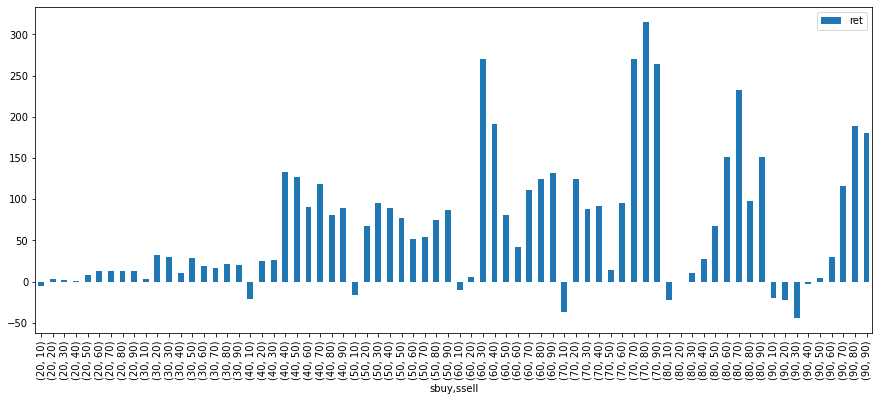

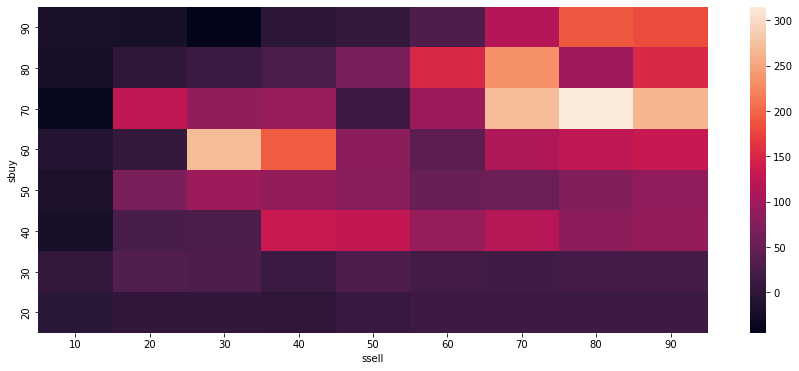

In [388]:
temp = df.copy()
fig, ax = plt.subplots(figsize=(15,6))
temp = temp[['sbuy', 'ssell', 'ret']].groupby(['sbuy', 'ssell']).prod()
temp['ret'] = (temp['ret']-1) * 100
temp.plot(kind='bar', ax=ax)
plt.show()
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(temp.reset_index().pivot("sbuy", "ssell", "ret"), vmin=temp['ret'].min(), vmax=temp['ret'].max())
ax.invert_yaxis()
plt.show()

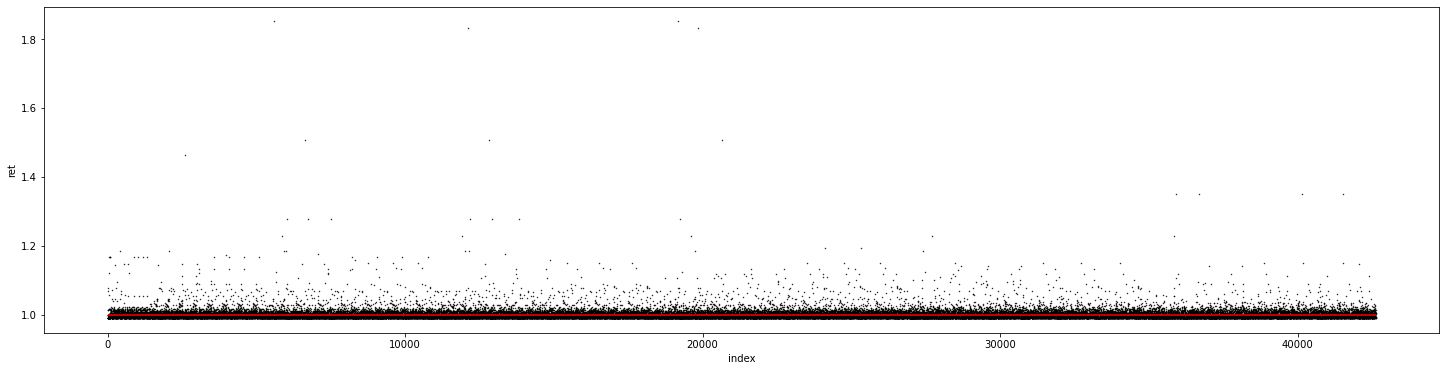

In [398]:
fig, ax = plt.subplots(figsize=(25,6))

temp = df.copy()
temp.reset_index().plot(x='index', y='ret', ax=ax, kind='scatter', s=0.2, color='black')
ax.hlines(y=1, color='r', linestyle='-', xmin=0, xmax=len(temp))